In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf

In [24]:
DATADIR ="/home/tasneem/Downloads/PH2.16 (copy)/train"
#DATADIR = "/home/tasneem/Downloads/derma_disease_dataset/dataset/train"
#DATADIR="/home/tasneem/Downloads/PH2.18/train"
#DATADIR ="/home/tasneem/Downloads/PH2. 9/train/"
#DATADIR ="/home/tasneem/Downloads/PH2.16 (copy)/test"

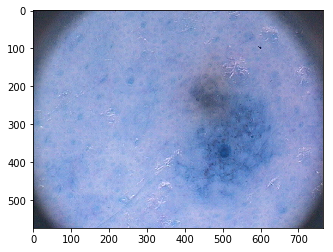

In [25]:
CATEGORIES = ["Atypical Nevus","Common Nevus","Melanoma"]
#CATEGORIES = ["melanoma","nevus","seborrheic_keratosis"]

#this section for testing join path succefully- shold apear an image after run it

for category in CATEGORIES:  # do melanoma and nevi
    path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
    for img in os.listdir(path):  # iterate over each image per melanoma and nevi
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

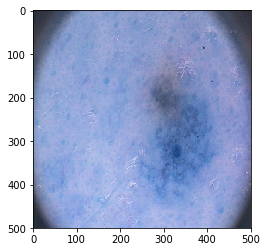

[[[55 50 61]
  [47 40 52]
  [56 48 61]
  ...
  [57 51 55]
  [56 48 52]
  [53 46 50]]

 [[49 50 60]
  [47 47 56]
  [46 44 55]
  ...
  [57 50 57]
  [54 47 54]
  [56 50 56]]

 [[39 47 61]
  [39 47 60]
  [37 44 57]
  ...
  [56 50 57]
  [55 48 55]
  [55 49 54]]

 ...

 [[38 46 62]
  [40 46 64]
  [43 47 67]
  ...
  [40 51 68]
  [44 54 69]
  [50 56 68]]

 [[37 48 64]
  [36 45 63]
  [35 44 64]
  ...
  [40 50 67]
  [43 53 69]
  [51 59 70]]

 [[38 49 64]
  [38 48 64]
  [37 46 64]
  ...
  [43 48 64]
  [46 52 66]
  [53 58 68]]]
(500, 500, 3)


In [26]:
IMG_SIZE = 500

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()# it will show the image in the size i written above
print(new_array)
print(new_array.shape)

In [27]:

# now i began preprocessin(make train set)
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do melanoma and nevi

        path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=melanoma 1=nevus

        for img in tqdm(os.listdir(path)):  # iterate over each image per melanoma and nevi
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
            #other way that i didnot find it helpfull for now..(:

create_training_data()

print(len(training_data))

100%|██████████| 35/35 [00:00<00:00, 847.31it/s]

180


In [28]:
import random

random.shuffle(training_data)#because of our data is orgnized so we need it

In [29]:
for sample in training_data[:10]:
    print(sample[1])#after shuffle it should be not orgized
    
print('--------------------')


print('--------------------')    

0
1
0
0
0
0
2
0
1
2
--------------------
--------------------


In [30]:
X = []
y = []

for features,label in training_data: #features means images or samples
    X.append(features)
    y.append(label)
print(X[0])
print('--------------------')
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))
print('--------------------')

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(X[0])
print('--------------------')




# confirm pixel range is 0-255

print('Data Type: %s' % X.dtype)
print('--------------------')

print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))

print('--------------------')

# normalize to the range 0-1
mean, std = X.mean(), X.std()


print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('--------------------')
X = X/255.0
#X = tf.keras.utils.normalize(X, axis=3)

#X = X/ np.std(X, axis = 0)
# confirm the normalization

print('Min: %.3f, Max: %.3f' % (X.min(), X.max()))


print('--------------------')
# calculate global mean and standard deviation

mean, std = X.mean(), X.std()

print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
print('--------------------')
print(X[0])
#X = tf.keras.utils.normalize(X, axis=1)
#print(X[0])


#X /= np.std(X, axis = 3)

[[[192 207 209]
  [207 211 213]
  [195 208 208]
  ...
  [197 209 209]
  [196 209 208]
  [197 210 208]]

 [[188 198 200]
  [160 160 164]
  [184 189 197]
  ...
  [184 183 194]
  [184 183 194]
  [186 185 197]]

 [[148 152 154]
  [  5   0   3]
  [128 125 145]
  ...
  [123 110 133]
  [124 110 133]
  [128 113 137]]

 ...

 [[146 154 156]
  [  1   1   1]
  [126 153 185]
  ...
  [142 146 177]
  [144 147 177]
  [147 148 178]]

 [[146 154 155]
  [  1   1   1]
  [126 153 184]
  ...
  [142 148 175]
  [143 147 173]
  [143 146 172]]

 [[146 154 154]
  [  1   1   1]
  [125 154 184]
  ...
  [ 35  13  39]
  [ 35  12  38]
  [ 37  13  39]]]
--------------------
[[[[192 207 209]
   [207 211 213]
   [195 208 208]
   ...
   [197 209 209]
   [196 209 208]
   [197 210 208]]

  [[188 198 200]
   [160 160 164]
   [184 189 197]
   ...
   [184 183 194]
   [184 183 194]
   [186 185 197]]

  [[148 152 154]
   [  5   0   3]
   [128 125 145]
   ...
   [123 110 133]
   [124 110 133]
   [128 113 137]]

  ...

  [[146 1

In [31]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


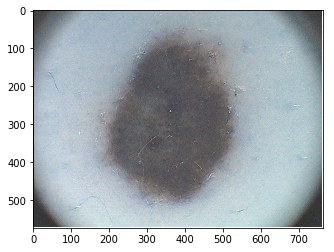

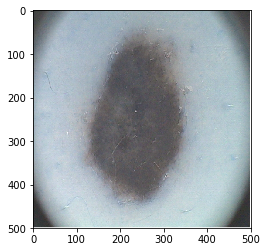

100%|██████████| 5/5 [00:00<00:00, 434.08it/s]

20
1
1
1
2
0
1
0
1
0
1
[[[[60 57 71]
   [56 51 67]
   [53 50 64]
   ...
   [65 60 75]
   [67 63 74]
   [32 29 35]]

  [[49 57 71]
   [51 57 74]
   [45 53 69]
   ...
   [56 59 75]
   [62 62 74]
   [30 28 33]]

  [[50 57 73]
   [50 54 73]
   [46 52 70]
   ...
   [59 62 78]
   [61 62 75]
   [27 26 32]]

  ...

  [[39 44 62]
   [38 43 60]
   [36 40 59]
   ...
   [39 46 62]
   [44 47 59]
   [23 25 31]]

  [[37 45 62]
   [33 41 59]
   [30 40 58]
   ...
   [21 20 33]
   [21 20 31]
   [16 15 22]]

  [[20 15 28]
   [21 15 29]
   [19 13 29]
   ...
   [19 12 25]
   [21 13 24]
   [18 15 20]]]]
Data Type: uint8
--------------------
Min: 0.000, Max: 255.000
--------------------
Min: 0.000, Max: 1.000
--------------------
[[[0.23529412 0.22352941 0.27843137]
  [0.21960784 0.2        0.2627451 ]
  [0.20784314 0.19607843 0.25098039]
  ...
  [0.25490196 0.23529412 0.29411765]
  [0.2627451  0.24705882 0.29019608]
  [0.1254902  0.11372549 0.1372549 ]]

 [[0.19215686 0.22352941 0.27843137]
  [0.2        0.

In [36]:
#DATADIR ="/home/tasneem/Downloads/PH2.16 (copy)/train"
#DATADIR = "/home/tasneem/Downloads/derma_disease_dataset/dataset/train"
#DATADIR="/home/tasneem/Downloads/PH2.18/train"
#DATADIR ="/home/tasneem/Downloads/PH2. 9/train/"
DATADIR ="/home/tasneem/Downloads/PH2.16 (copy)/test"

CATEGORIES = ["Atypical Nevus","Common Nevus","Melanoma"]
#CATEGORIES = ["melanoma","nevus","seborrheic_keratosis"]

#this section for testing join path succefully- shold apear an image after run it

for category in CATEGORIES:  # do melanoma and nevi
    path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
    for img in os.listdir(path):  # iterate over each image per melanoma and nevi
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
IMG_SIZE = 500

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show() # it will show the image in the size i written above

# now i began preprocessin(make train set)
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do melanoma and nevi

        path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=melanoma 1=nevus

        for img in tqdm(os.listdir(path)):  # iterate over each image per melanoma and nevi
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
            #other way that i didnot find it helpfull for now..(:

create_training_data()

print(len(training_data))

import random

random.shuffle(training_data)#because of our data is orgnized so we need it

for sample in training_data[:10]:
    print(sample[1])#after shuffle it should be not orgized
    
X_test = []
y_test = []

for features,label in training_data: #features means images or samples
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)



# confirm pixel range is 0-255

print('Data Type: %s' % X_test.dtype)
print('--------------------')

print('Min: %.3f, Max: %.3f' % (X_test.min(), X_test.max()))

print('--------------------')

# normalize to the range 0-1

X_test = X_test/255.0
#X_test = tf.keras.utils.normalize(X_test, axis=3)
# confirm the normalization

print('Min: %.3f, Max: %.3f' % (X_test.min(), X_test.max()))
print('--------------------')
print(X_test[0])

print('--------------------')
mean, std = X_test.mean(), X_test.std()

print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

#X_test = tf.keras.utils.normalize(X_test, axis=0)
#print(X_test[0])
#print('=========')
#X_test=X_test/255.0
#print(X_test[0])


In [37]:
pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [38]:
print(X.shape)
print(X_test.shape)

(180, 500, 500, 3)
(20, 500, 500, 3)
